In [1]:
# dependencies
from sklearn import datasets
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearSVM:
    def fit(self, X, Y, eta=0.01, epochs=20):
        # one-liner SVM train
        self.w = reduce(lambda w_outer,epoch: reduce(lambda w,i: w + eta*((X[i]*Y[i]) + (-2*(1/epoch)*w)) if (Y[i]*np.dot(X[i],w)) < 1 else w + eta*(-2*(1/epoch)*w), [w_outer] + list(range(len(X)))), [np.zeros(X.shape[1])] + list(range(1,epochs)))


In [3]:
class LinearSVM:
    """ Linear support vector machine, unrolled version of above """
    
    def fit(self, X, Y, eta=0.01, epochs=20):
        """ Fit the data to the SVM classifier
        
        Arguments:
        X - the dataset
        Y - the labels (-1,1)
        eta - learning rate
        epochs - the number of times the dataset is iterated through
        """
        self.w = np.zeros(X.shape[1])

        for epoch in range(1,epochs):
            for i, x in enumerate(X):
                if (Y[i]*np.dot(X[i], self.w)) < 1: # wrongly classified
                    # margin maximization + hinge loss 
                    self.w = self.w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* self.w) ) 
                else:
                    # only margin maximization
                    self.w = self.w + eta * (-2  *(1/epoch)* self.w)


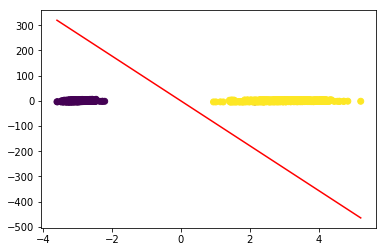

In [4]:
# generate dataset
X, Y = datasets.make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0, n_classes=2, class_sep=3)

svm = LinearSVM()
svm.fit(X,Y)

# plot data
plt.scatter(X[:,0],X[:,1], c=Y)

# plot trained model regression line
xs = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
ys = -(svm.w[0]/svm.w[1])*xs #- b/svm.w[1]
plt.plot(xs,ys, color='red')
plt.show()